## Implementation of a CNN model to identify the disease of plant leaf, using Python in jupyter notebook.
## Student Name: Gargi Darade.
## Subject/Class: CMPS 451 Artificial Intelligence.

In [67]:
#Import the required libraries
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image

#current_path = os.getcwd()
#print(current_path)



#### Number of Classes.

In [68]:
# Dataset Path
base_dir = 'plantvillage'
print("Number of Classes:"+str(len(os.listdir(base_dir))))
img_classes=os.listdir(base_dir)
print("Image classes:")
print(img_classes)

Number of Classes:15
Image classes:
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


#### Sample images from all classes

Image class:Pepper__bell___Bacterial_spot
Image path:plantvillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
Image shape:(256, 256, 3)


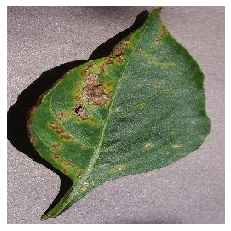

Image class:Pepper__bell___healthy
Image path:plantvillage/Pepper__bell___healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG
Image shape:(256, 256, 3)


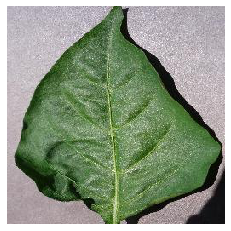

Image class:Potato___Early_blight
Image path:plantvillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
Image shape:(256, 256, 3)


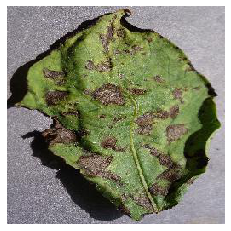

Image class:Potato___healthy
Image path:plantvillage/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
Image shape:(256, 256, 3)


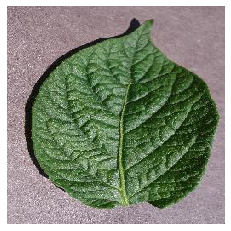

Image class:Potato___Late_blight
Image path:plantvillage/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG
Image shape:(256, 256, 3)


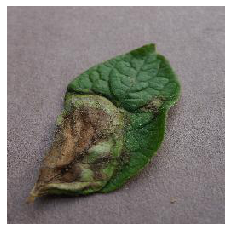

Image class:Tomato_Bacterial_spot
Image path:plantvillage/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
Image shape:(256, 256, 3)


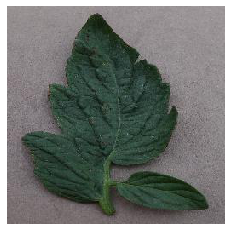

Image class:Tomato_Early_blight
Image path:plantvillage/Tomato_Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG
Image shape:(256, 256, 3)


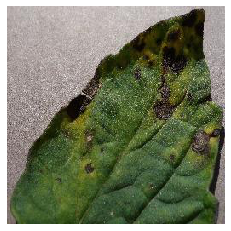

Image class:Tomato_healthy
Image path:plantvillage/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG
Image shape:(256, 256, 3)


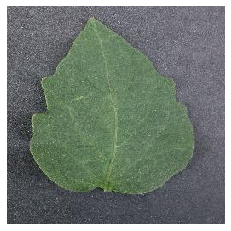

Image class:Tomato_Late_blight
Image path:plantvillage/Tomato_Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG
Image shape:(256, 256, 3)


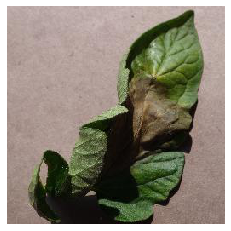

Image class:Tomato_Leaf_Mold
Image path:plantvillage/Tomato_Leaf_Mold/00694db7-3327-45e0-b4da-a8bb7ab6a4b7___Crnl_L.Mold 6923.JPG
Image shape:(256, 256, 3)


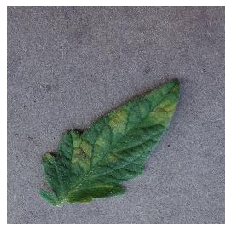

Image class:Tomato_Septoria_leaf_spot
Image path:plantvillage/Tomato_Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG
Image shape:(256, 256, 3)


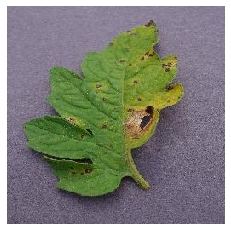

Image class:Tomato_Spider_mites_Two_spotted_spider_mite
Image path:plantvillage/Tomato_Spider_mites_Two_spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG
Image shape:(256, 256, 3)


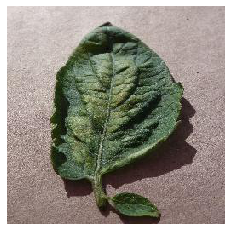

Image class:Tomato__Target_Spot
Image path:plantvillage/Tomato__Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG
Image shape:(256, 256, 3)


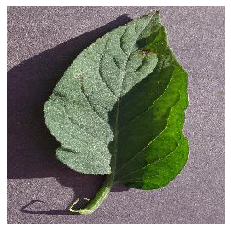

Image class:Tomato__Tomato_mosaic_virus
Image path:plantvillage/Tomato__Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG
Image shape:(256, 256, 3)


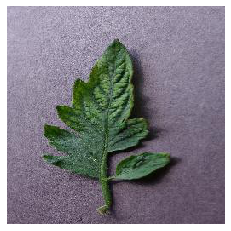

Image class:Tomato__Tomato_YellowLeaf__Curl_Virus
Image path:plantvillage/Tomato__Tomato_YellowLeaf__Curl_Virus/00139ae8-d881-4edb-925f-46584b0bd68c___YLCV_NREC 2944.JPG
Image shape:(256, 256, 3)


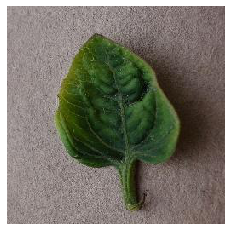

In [70]:
flCnt=1
for img_class in img_classes:
    print("Image class:"+img_class)
    tmp_file=os.listdir(base_dir+"/"+img_class)[:1]
    image_path =base_dir+"/"+img_class+"/"+ tmp_file[0]
    print("Image path:"+image_path)
    # Read the image
    img = mpimg.imread(image_path)
    print("Image shape:"+str(img.shape))
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.savefig("clsRepImg" + str(flCnt) +".png")
    flCnt=flCnt+1
    plt.show()
   


In [71]:
# Image Parameters
img_size = 224
batch_size = 32

#### Train Test Split

In [72]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [73]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 16516 images belonging to 15 classes.


In [74]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 4122 images belonging to 15 classes.


### Convolutional Neural Network

In [75]:

# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [76]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [77]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Model training

In [78]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
516/516 [==============================] - 585s 1s/step - loss: 1.1255 - accuracy: 0.6690 - val_loss: 0.5227 - val_accuracy: 0.8262
Epoch 2/10
516/516 [==============================] - 583s 1s/step - loss: 0.3572 - accuracy: 0.8829 - val_loss: 0.4483 - val_accuracy: 0.8452
Epoch 3/10
516/516 [==============================] - 584s 1s/step - loss: 0.1372 - accuracy: 0.9547 - val_loss: 0.4470 - val_accuracy: 0.8613
Epoch 4/10
516/516 [==============================] - 583s 1s/step - loss: 0.0767 - accuracy: 0.9756 - val_loss: 0.5408 - val_accuracy: 0.8660
Epoch 5/10
516/516 [==============================] - 583s 1s/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.6105 - val_accuracy: 0.8401
Epoch 6/10
516/516 [==============================] - 583s 1s/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.6552 - val_accuracy: 0.8430
Epoch 7/10
516/516 [==============================] - 583s 1s/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 1.0894 - val_accuracy: 0.7869

#### Model Evaluation

In [79]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
128/128 [==============================] - 27s 211ms/step - loss: 0.7465 - accuracy: 0.8643
Validation Accuracy: 86.43%


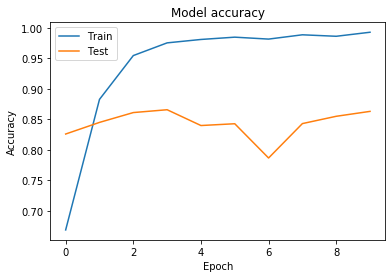

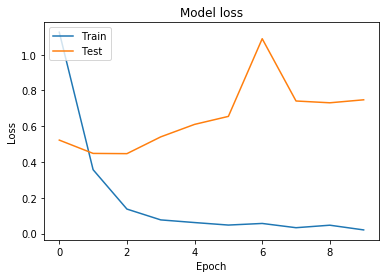

In [80]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("ModelAccuracy.png")
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("ModelLoss.png")
plt.show()

#### Building a Predictive System

In [81]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [82]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [83]:
class_indices

{0: 'Pepper__bell___Bacterial_spot',
 1: 'Pepper__bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato_Bacterial_spot',
 6: 'Tomato_Early_blight',
 7: 'Tomato_Late_blight',
 8: 'Tomato_Leaf_Mold',
 9: 'Tomato_Septoria_leaf_spot',
 10: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 11: 'Tomato__Target_Spot',
 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 13: 'Tomato__Tomato_mosaic_virus',
 14: 'Tomato_healthy'}

In [84]:

# Example Usage
image_path = 'test_images/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 83ms/step
Predicted Class Name: Potato___Early_blight


#### Save the model to local drive

In [85]:
model.save('PlantDiseasePredictionCNNModel.h5')